In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("Custom.csv")

R²: 0.9867444629429168
Balance esperado: 33715.00
Balance real: 20000.00
Diferencia: 13715.00
Clasificación: Normal


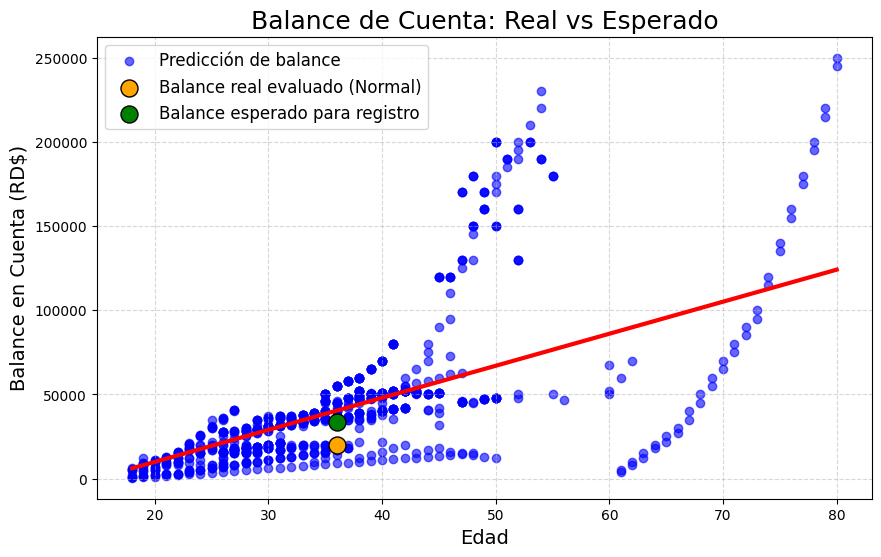

In [56]:
# Age,Account_Balance,Salary,Is_Employee,Last_Transaction_Amount,Credit_Score,Fraud,Account_Age_Years,Education_Level,Location,Company_Size
features = [
    'Age', 'Salary', 'Is_Employee', 'Last_Transaction_Amount', 'Credit_Score', 'Account_Age_Years', 'Education_Level', 'Location', 'Company_Size', 'Fraud'
]

target = 'Account_Balance'

# Crear X e Y
X = df[features]
y = df[target]

# Convertir categóricas en dummies
X = pd.get_dummies(X, drop_first=True)

# Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Evaluar
score = modelo.score(X_test, y_test)
print("R²:", score)

# Education_Level: 0=Analfabeto, 1=Primaria, 2=Secundaria, 3=Técnico, 4=Universitario, 5=Postgrado

# Location: 1=Urbano, 2=Rural

# Company_Size: 1=Micro (<10) ,1=Pequeña (<25),2=PYME (<50), 3=Mediana (50-200), 4=Grande (>200)

pp = {
    "Age": 36,
    "Account_Balance": 20000.00,
    "Salary": 45000,
    "Is_Employee": 1,
    "Education_Level": 4,
    "Company_Size":2,
    "Location":1,
}

balance_real = pp['Account_Balance']
edad = pp['Age']
salary_base = pp['Salary']

# Pasar a DataFrame
pp_df = pd.DataFrame([pp])

# Aplicar las mismas transformaciones (get_dummies + reindex)
pp_df = pd.get_dummies(pp_df, drop_first=True)
pp_df = pp_df.reindex(columns=X.columns, fill_value=0)

# Predecir balance esperado
balance_esperado = modelo.predict(pp_df)[0]

# Calcular diferencia
diferencia = abs(balance_real - balance_esperado)

tolerancia = 0.5 * abs(balance_esperado)

# Regla de clasificación
estado = "Sospechoso/Fraude" if diferencia > tolerancia else "Normal"
# ===============================
# Resultados
# ===============================
print(f"Balance esperado: {balance_esperado:.2f}")
print(f"Balance real: {balance_real:.2f}")
print(f"Diferencia: {diferencia:.2f}")
print("Clasificación:", estado)

plt.figure(figsize=(10,6))

# Puntos reales
plt.scatter(df['Age'], df['Account_Balance'], color='blue', alpha=0.6, label='Predicción de balance')

ages_range = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
age_predictions = []

for age in ages_range:
    temp_pp = pp.copy()
    temp_pp['Age'] = age[0]

    temp_pp['Salary'] = salary_base * (1 + 0.03 * (age - edad))[0]
    temp_pp['Last_Transaction_Amount'] = salary_base * 0.3
    base_account_age = pp.get('Account_Age_Years', 0)
    temp_pp['Account_Age_Years'] = base_account_age + (age - edad)[0]

    temp_df = pd.DataFrame([temp_pp])
    temp_df = pd.get_dummies(temp_df)
    temp_df = temp_df.reindex(columns=X.columns, fill_value=0)
    prediction = modelo.predict(temp_df)[0]
    age_predictions.append(prediction)

plt.plot(ages_range, age_predictions, color='red', linewidth=3)

# Punto específico a evaluar
plt.scatter(edad, balance_real, color='orange', s=150, edgecolor='black', label=f'Balance real evaluado ({estado})')
plt.scatter(edad, balance_esperado, color='green', s=150, edgecolor='black', label='Balance esperado para registro')

# Etiquetas y título
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Balance en Cuenta (RD$)", fontsize=14)
plt.title("Balance de Cuenta: Real vs Esperado", fontsize=18)

# Leyenda grande
plt.legend(fontsize=12)

# Grid más visible
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()